# 統計的検定における2種類の過誤


|                     | 帰無仮説の棄却（reject）      | 帰無仮説の採択（accept）      |
|---------------------|---------------------------|---------------------------|
| 帰無仮説が真（true）のとき | 第１種の過誤（Type 1 error） | 正解                     |
| 帰無仮説が偽（false）のとき| 正解                     | 第２種の過誤（Type 2 error） | 

- 第1種の過誤（Type I Error 偽陽性）は、有意水準に対応し、帰無仮説が真であるのに誤って棄却してしまう過誤を意味します。
- 第2種の過誤（Type II Error 偽陰性）は、帰無仮説が偽であるにもかかわらず、誤って帰無仮説を採択してしまう過誤を指します。

これら2つの過誤は検定の結果を評価する際の重要な要素であり、理想的な検定は第1種の過誤（α）を一定に抑えつつ、第2種の過誤（β）を最小限にする、つまり検出力（1−β）を高める設計を目指します。

In [ ]:
pip install japanize-matplotlib

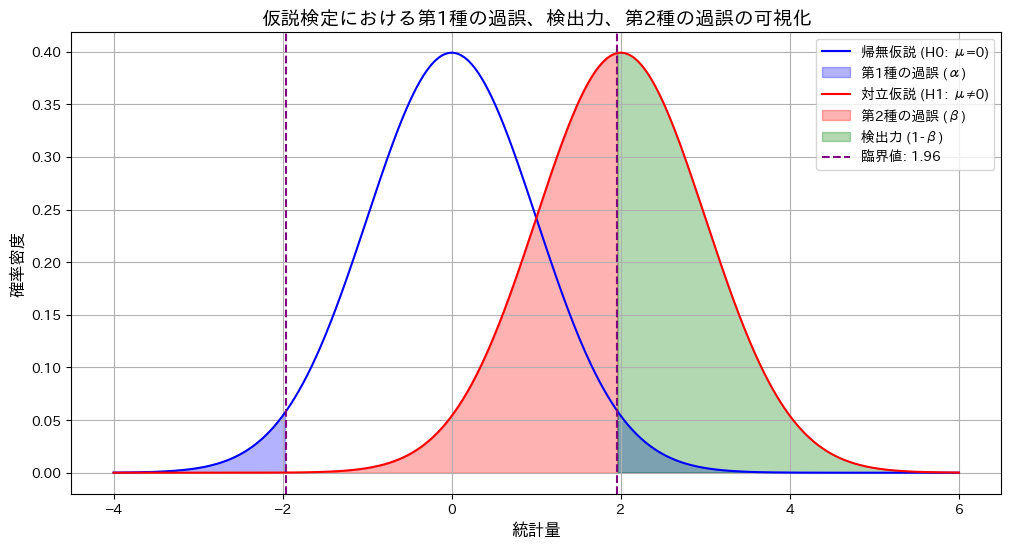

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import norm

# パラメータ設定
alpha = 0.05  # 有意水準
effect_size = 2.0  # 効果量 (対立仮説の平均 - 帰無仮説の平均)
std_dev = 1.0  # 標準偏差（共通）
critical_value = norm.ppf(1 - alpha/2)  # 両側検定の臨界値
x = np.linspace(-4, 6, 1000)  # x軸の範囲

# 帰無仮説と対立仮説の分布
null_dist = norm.pdf(x, 0, std_dev)
alt_dist = norm.pdf(x, effect_size, std_dev)

# 描画準備
plt.figure(figsize=(12, 6))

# 帰無仮説の分布
plt.plot(x, null_dist, label="帰無仮説 (H0: μ=0)", color="blue")
plt.fill_between(x, 0, null_dist, where=((x < -critical_value) | (x > critical_value)),
                 color="blue", alpha=0.3, label="第1種の過誤 (α)")

# 対立仮説の分布
plt.plot(x, alt_dist, label="対立仮説 (H1: μ≠0)", color="red")
plt.fill_between(x, 0, alt_dist, where=(x < critical_value) & (x > -critical_value),
                 color="red", alpha=0.3, label="第2種の過誤 (β)")
plt.fill_between(x, 0, alt_dist, where=(x > critical_value) | (x < -critical_value),
                 color="green", alpha=0.3, label="検出力 (1-β)")

# 臨界値線の追加
plt.axvline(x=critical_value, color="purple", linestyle="--", label=f"臨界値: {critical_value:.2f}")
plt.axvline(x=-critical_value, color="purple", linestyle="--")

# グラフの詳細設定
plt.title("仮説検定における第1種の過誤、検出力、第2種の過誤の可視化", fontsize=14)
plt.xlabel("統計量", fontsize=12)
plt.ylabel("確率密度", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


前出の２種類の過誤を色付けしたもの。

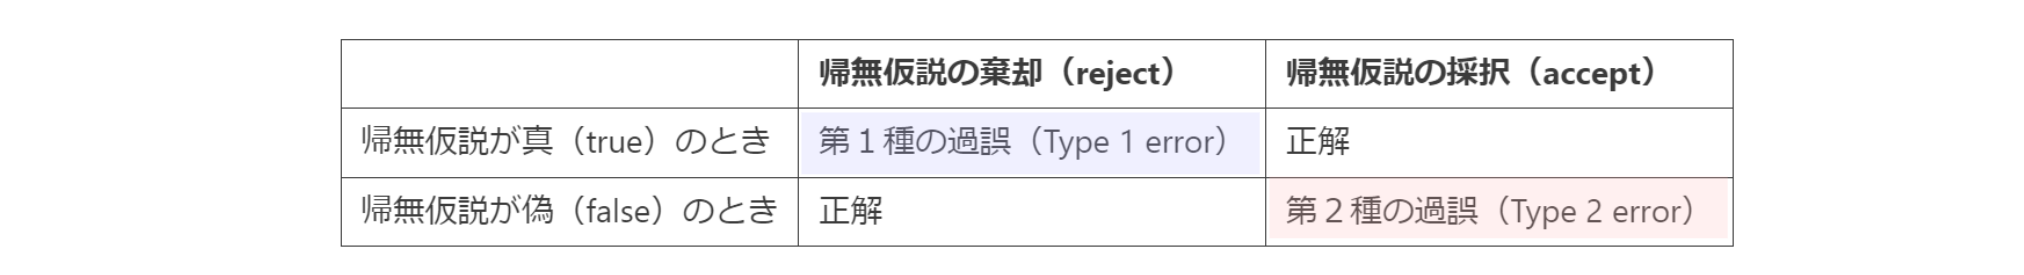

## αと効果量による違い

以下はαが一般的な0.05と0.01の時、おより効果量が1.0, 0.5, 2.0の時の２種類の過誤の範囲と検出力の可視化。

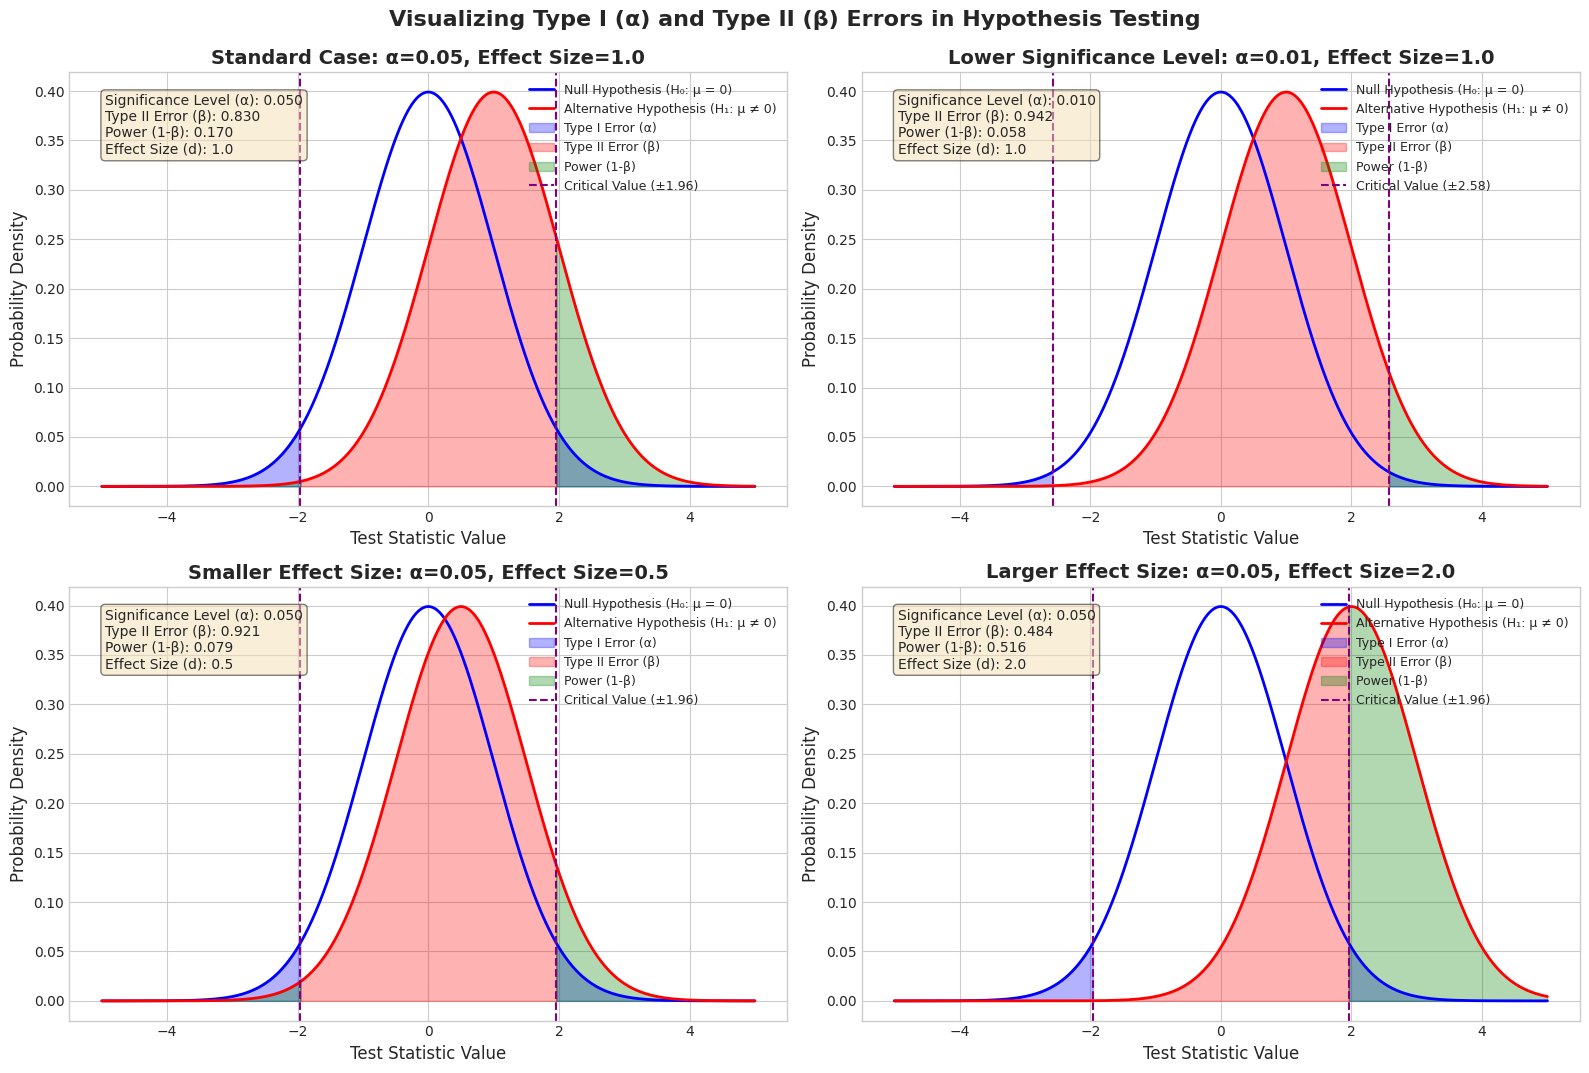

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.gridspec as gridspec

# Function to create a single hypothesis testing plot
def create_hypothesis_test_plot(ax, alpha, effect_size):
    # Set up x range
    x = np.linspace(-5, 5, 1000)
    
    # Critical values for two-tailed test
    critical_value = stats.norm.ppf(1 - alpha/2)
    
    # Null hypothesis distribution (μ = 0, σ = 1)
    y_null = stats.norm.pdf(x, 0, 1)
    
    # Alternative hypothesis distribution (μ = effect_size, σ = 1)
    y_alt = stats.norm.pdf(x, effect_size, 1)
    
    # Calculate areas for errors
    # Type I error (α) - false positive area
    x_typeI = np.linspace(critical_value, 5, 200)
    y_typeI = stats.norm.pdf(x_typeI, 0, 1)
    x_typeI_neg = np.linspace(-5, -critical_value, 200)
    y_typeI_neg = stats.norm.pdf(x_typeI_neg, 0, 1)
    
    # Type II error (β) - false negative area
    x_typeII = np.linspace(-critical_value, critical_value, 200)
    y_typeII = stats.norm.pdf(x_typeII, effect_size, 1)
    
    # Power (1-β) - true positive area
    x_power_right = np.linspace(critical_value, 5, 200)
    y_power_right = stats.norm.pdf(x_power_right, effect_size, 1)
    x_power_left = np.linspace(-5, -critical_value, 200)
    y_power_left = stats.norm.pdf(x_power_left, effect_size, 1)
    
    # Plot the distributions
    ax.plot(x, y_null, 'b-', linewidth=2, label='Null Hypothesis (H₀: μ = 0)')
    ax.plot(x, y_alt, 'r-', linewidth=2, label='Alternative Hypothesis (H₁: μ ≠ 0)')
    
    # Fill in the error areas
    ax.fill_between(x_typeI, 0, y_typeI, color='blue', alpha=0.3, label='Type I Error (α)')
    ax.fill_between(x_typeI_neg, 0, y_typeI_neg, color='blue', alpha=0.3)
    ax.fill_between(x_typeII, 0, y_typeII, color='red', alpha=0.3, label='Type II Error (β)')
    
    # Fill in the power area
    ax.fill_between(x_power_right, 0, y_power_right, color='green', alpha=0.3, label='Power (1-β)')
    ax.fill_between(x_power_left, 0, y_power_left, color='green', alpha=0.3)
    
    # Add vertical lines for critical values
    ax.axvline(x=critical_value, color='purple', linestyle='--', linewidth=1.5, 
               label=f'Critical Value (±{critical_value:.2f})')
    ax.axvline(x=-critical_value, color='purple', linestyle='--', linewidth=1.5)
    
    # Calculate actual errors
    type_I_error = alpha
    type_II_error = stats.norm.cdf(critical_value, loc=effect_size) - stats.norm.cdf(-critical_value, loc=effect_size)
    power = 1 - type_II_error
    
    # Annotations - add text boxes with error values
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textstr = '\n'.join((
        f'Significance Level (α): {type_I_error:.3f}',
        f'Type II Error (β): {type_II_error:.3f}',
        f'Power (1-β): {power:.3f}',
        f'Effect Size (d): {effect_size}'
    ))
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    # Set labels
    ax.set_xlabel('Test Statistic Value', fontsize=12)
    ax.set_ylabel('Probability Density', fontsize=12)
    ax.legend(loc='upper right', fontsize=9)
    
    return ax

# Create a 2x2 grid of plots showing different combinations
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2)

# 1. Top left: Standard case (α=0.05, effect size=1.0)
ax1 = plt.subplot(gs[0, 0])
create_hypothesis_test_plot(ax1, alpha=0.05, effect_size=1.0)
ax1.set_title('Standard Case: α=0.05, Effect Size=1.0', fontsize=14, fontweight='bold')

# 2. Top right: Lower significance level (α=0.01, effect size=1.0)
ax2 = plt.subplot(gs[0, 1])
create_hypothesis_test_plot(ax2, alpha=0.01, effect_size=1.0)
ax2.set_title('Lower Significance Level: α=0.01, Effect Size=1.0', fontsize=14, fontweight='bold')

# 3. Bottom left: Smaller effect size (α=0.05, effect size=0.5)
ax3 = plt.subplot(gs[1, 0])
create_hypothesis_test_plot(ax3, alpha=0.05, effect_size=0.5)
ax3.set_title('Smaller Effect Size: α=0.05, Effect Size=0.5', fontsize=14, fontweight='bold')

# 4. Bottom right: Larger effect size (α=0.05, effect size=2.0)
ax4 = plt.subplot(gs[1, 1])
create_hypothesis_test_plot(ax4, alpha=0.05, effect_size=2.0)
ax4.set_title('Larger Effect Size: α=0.05, Effect Size=2.0', fontsize=14, fontweight='bold')

plt.tight_layout(rect=[0, 0.1, 1, 0.97])
plt.suptitle('Visualizing Type I (α) and Type II (β) Errors in Hypothesis Testing', 
             fontsize=16, fontweight='bold', y=0.99)

# Save the figure
plt.savefig('hypothesis_testing_errors.png', dpi=300, bbox_inches='tight')
plt.show()

重要な観察点:
1. 有意水準 (α) を下げる（右上のグラフ）と第1種の過誤が減るが、第2種の過誤が増える
2. 効果量を増やす（右下のグラフ）と第2種の過誤が減り、検出力（緑）が向上する
3. 効果量が小さい（左下のグラフ）と第2種の過誤が大きく（低い検出力）


第1種の過誤 (α): 真の帰無仮説を棄却する確率（偽陽性）
- 有意水準 (α) によって制御
- 領域: 臨界値 (±z) の外側

第2種の過誤 (β): 偽の帰無仮説を棄却しない確率（偽陰性）
- 効果量、サンプルサイズ、およびαに影響される
- 領域: 対立仮説が正しい場合の臨界値間

検出力 (1-β): 偽の帰無仮説を正しく棄却する確率
- 効果量やサンプルサイズが増えると上昇
- 有意水準 (α) を減少させると低下
